In [4]:
#Imprt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [2]:
# Exercise 3.01 - Mall Customer Segmentation - Understanding the Data
data0 = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter03/Datasets/Mall_Customers.csv')
data0.head(2)

#Look at the info of the data
data0.info()

#Rename annual income and spending score
data0.rename({'Annual Income (k$)' : 'Income',
              'Spending Score (1-100)' : 'Spend_score'}, 
              axis = 1,
              inplace = True)
data0.head()

#Look at high level stats of the data 
data0.describe().T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spend_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Cluster,High earners,Low Income,Moderate Income
count,22.000000,72.000000,106.000000
mean,108.181818,33.027778,69.377358
std,13.661334,11.091136,10.651584
min,93.000000,15.000000,50.000000
25%,98.250000,22.500000,61.000000
50%,103.000000,33.500000,70.000000
75%,118.250000,43.000000,78.000000
max,137.000000,49.000000,88.000000


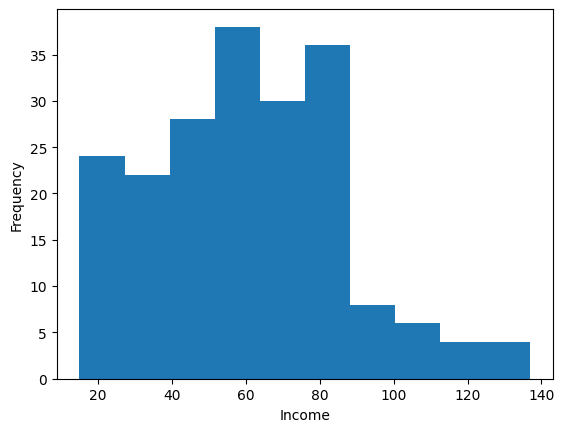

In [3]:
# Exercise 3.02 - Traditional Segmentation of Mall Customers

#Plot a histogram of income
data0.Income.plot.hist()
plt.xlabel('Income')
plt.show

#Create a new cluster of income
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners',
                            np.where(data0.Income < 50 , 'Low Income',
                                     'Moderate Income'))

#Look at income by cluster
data0.groupby('Cluster')['Income'].describe().T

In [6]:
# Exercise 3.03 - Standardizing Customer Data

#Create an instance of standard scaler
scaler = StandardScaler()

#Create scaled cols and copy data frame
cols_to_scale = ['Age','Income','Spend_score']
data_scaled = data0.copy()

#Use fit transform method on the cols to be scaled
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

#Describe the new cols 
data_scaled[cols_to_scale].describe().T



,count,mean,std,min,25%,50%,75%,max
Age,200.0,-1.021405e-16,1.002509,-1.496335,-0.724844,-0.204535,0.728432,2.235532
Income,200.0,-2.131628e-16,1.002509,-1.738999,-0.727509,0.035879,0.665675,2.917671
Spend_score,200.0,-1.465494e-16,1.002509,-1.910021,-0.599793,-0.007764,0.885132,1.894492


In [9]:
# Exercise 3.04 - Calculating the distance between customers

#Extract first 3 cust 
sel_cols = ['Income', 'Spend_score']
cust3  = data_scaled[sel_cols].head(3)
cust3

#Import cdist method 
from scipy.spatial.distance import cdist

#Calc distance using cdist 
cdist(cust3, cust3, metric = 'euclidean')

#Verify euclidean distance 
np.sqrt((-1.739 + 1.739) ** 2 + (-0.4348 - 1.1957) ** 2)

np.float64(1.6305)

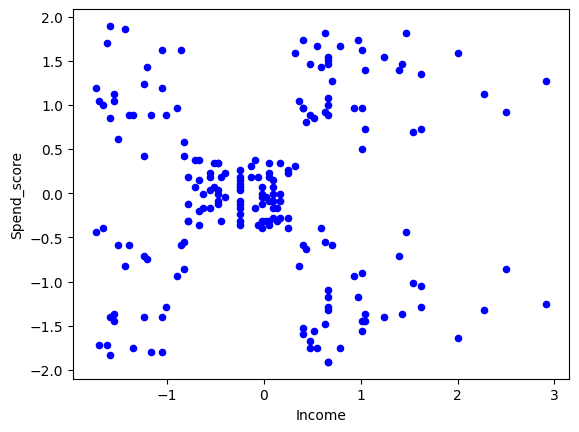

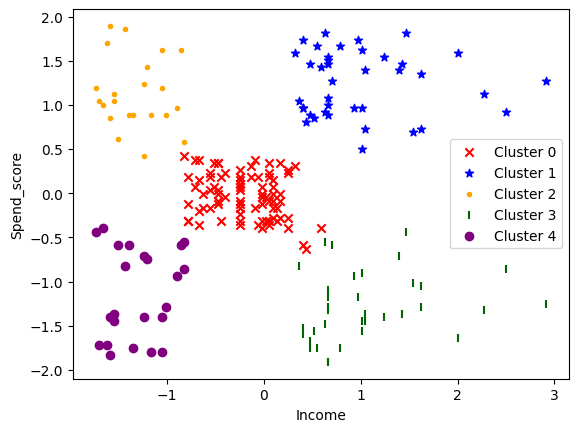

In [19]:
# Exercise 3.05 - K-Means Clustering on Mall Customers 

#Create col clusters and look at top 3
cluster_cols = ['Income','Spend_score']
data_scaled[cluster_cols].head(3)

# Cizualise the income and spendscore on scatter plot
data_scaled.plot.scatter(x = 'Income',
                         y = 'Spend_score',
                         color = 'blue')
plt.show()

#Import K-Means 
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, random_state = 42)

#Fit the model on the data fo cluster cols 
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

#Visualize the cluster groups
markers = ['x', '*', '.', '|', 'o']
colors = ['red', 'blue', 'orange', 'darkgreen', 'purple']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(
        temp.Income,
        temp.Spend_score,
        marker=markers[clust],
        color=colors[clust],
        label='Cluster ' + str(clust)
    )

plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

In [27]:
#Activity 3.01 - Bank Customer Segmentation for Loan Campaign

#Load in the dataset
loans = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter03/Datasets/Bank_Personal_Loan_Modelling-1.csv')
#Check Dtypes and missing values
loans.info()
#Understanding basic stats 
loans.describe(include = 'all').T

#Columns to be scaled
loans['Income_scaled'] = scaler.fit_transform(loans[['Income']])
loans['CCAvg_scaled'] = scaler.fit_transform(loans[['CCAvg']])


loans.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736
